In [ ]:
#Python code for my data analysis of the titanic dataset.

In [7]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
df=pd.read_csv('titanic.csv') #Reading the dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info() #so we can quickly see the variables and data types.
#Shows us that we are missing values in Age,Cabin, and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_cat=df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
#Subsetting the categorical values as we are using these for our hypotheses.

In [17]:
#drop null embarked rows only 2 of them 
df_cat.dropna(subset=['Embarked'],inplace=True)

C:\Users\cool_\AppData\Local\Temp\ipykernel_11440\47249934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.dropna(subset=['Embarked'],inplace=True)


C:\Users\cool_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


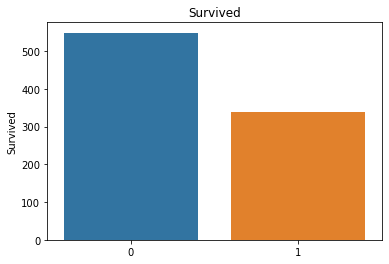

C:\Users\cool_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


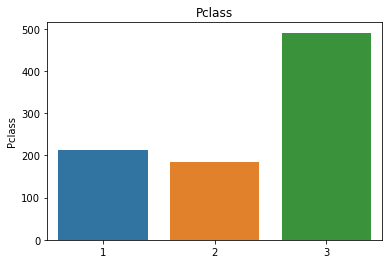

C:\Users\cool_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


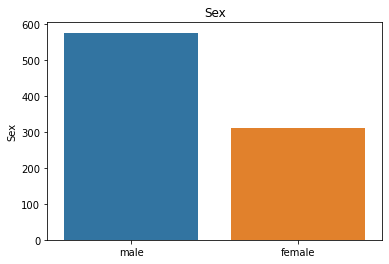

C:\Users\cool_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


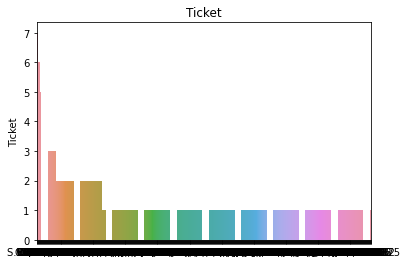

C:\Users\cool_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


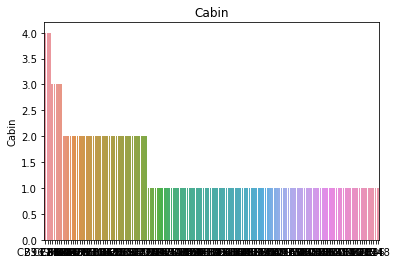

C:\Users\cool_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


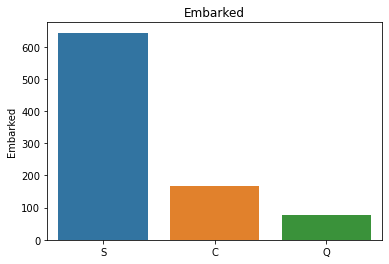

In [18]:
#Shows the counts for single categorical variable. I like to see the distribution quickly here.
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [19]:
#Pivot tables to show the proportion of survived in each variable
SurvivedPclass=pd.pivot_table(df, index= 'Survived', columns= 'Pclass',values='Ticket',aggfunc='count',margins = True, margins_name='Total')
print(SurvivedPclass)
SurvivedSex=pd.pivot_table(df, index= 'Survived', columns= 'Sex',values='Ticket',aggfunc='count',margins = True, margins_name='Total')
print(SurvivedSex)
SurvivedEmarked=pd.pivot_table(df, index= 'Survived', columns= 'Embarked',values='Ticket',aggfunc='count',margins = True, margins_name='Total')
print(SurvivedEmarked)

Pclass      1    2    3  Total
Survived                      
0          80   97  372    549
1         136   87  119    342
Total     216  184  491    891
Sex       female  male  Total
Survived                     
0             81   468    549
1            233   109    342
Total        314   577    891
Embarked    C   Q    S  Total
Survived                     
0          75  47  427    549
1          93  30  217    340
Total     168  77  644    889


In [10]:
#Testing Signficance with Chi Square Analysis#

In [20]:
#Shows the Chisquare Analysis for the associated gender and survival rate.
sexsurv = [[81,468],
			   [231,109]] #This is the data array for Sex and Survived
print(sexsurv)
stat, p, dof, expected = chi2_contingency(sexsurv)
# interpret test-statistic
prob = 0.95
chi = chi2.ppf(prob, dof)
print(chi) #This shows our Chi Value which uses the probability and degrees of freedom to obtain
if abs(stat) >= chi:
	print('reject Ho')
else:
	print('fail to reject Ho')
#This shows that gender has a roll in survival rate.

[[81, 468], [231, 109]]
3.841458820694124
reject Ho


In [21]:
#Shows the Chi Square analysis for the Pclass and Survival rate.
survclass =[[80,97,372],
 [134,87,119]] #This is the data array for Class and Survived
print(survclass)
stat, p, dof, expected = chi2_contingency(survclass)
# interpret test-statistic
prob = 0.95
chi = chi2.ppf(prob, dof)
print(chi) #This shows our Chi Value which uses the probability and degrees of freedom to obtain
if abs(stat) >= chi:
	print('reject Ho')
else:
	print('fail to reject Ho')


[[80, 97, 372], [134, 87, 119]]
5.991464547107979
reject Ho


In [23]:
#Shows the ChiSquare Analysis for the Embarked Port and Survival rate.
survem =[[75,47,427],
 [93,30,217]] #This is the data array for Embarked and Survived
print(survem)
stat, p, dof, expected = chi2_contingency(survem)
# interpret test-statistic
prob = 0.95
chi = chi2.ppf(prob, dof)
print(chi) #This shows our Chi Value which uses the probability and degrees of freedom to obtain
if abs(stat) >= chi:
	print('reject Ho')
else:
	print('fail to reject Ho')
#This shows that gender has a roll in survival rate.

[[75, 47, 427], [93, 30, 217]]
5.991464547107979
reject Ho


In [ ]:
#Final Graphs to visualize the percentage of survival with each categorical variable#

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

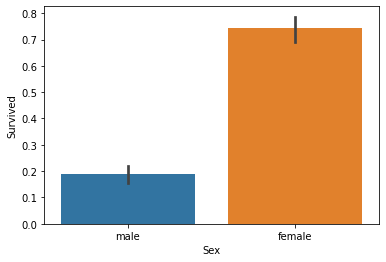

In [24]:
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

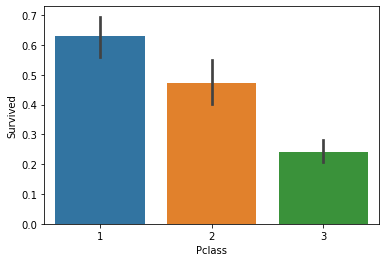

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

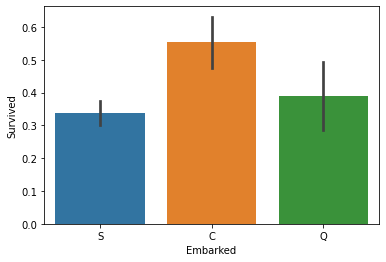

In [16]:
sns.barplot(x='Embarked', y='Survived', data=df)